# <center><strong> Hand gesture recognition </strong></center>
-----------------------------------------------------------

#### **By Mohamed Jamyl**

http://linkedin.com/in/mohamed-jamyl

https://www.kaggle.com/mohamedjamyl

https://github.com/Mohamed-Jamyl

--------------------------------------------

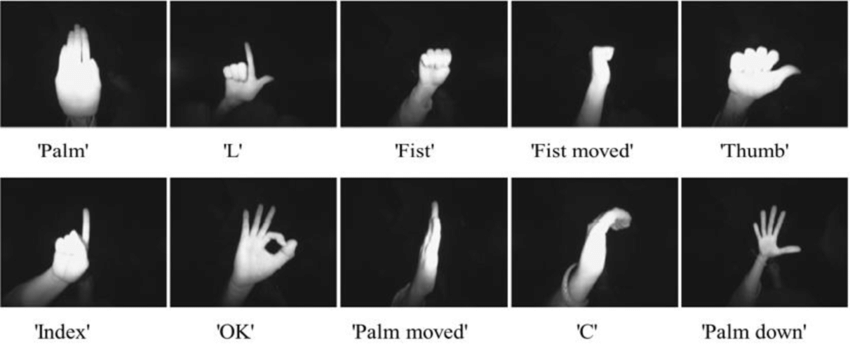

In [1]:
from IPython.display import Image
Image(filename='img.png')

---------------------------------------------

## <center><strong> Context </strong></center>
### **Hand gesture recognition database is presented, composed by a set of near infrared images acquired by the Leap Motion sensor.**
## <center><strong> Content </strong></center>
### **The database is composed by 10 different hand-gestures (showed above) that were performed by 10 different subjects (5 men and 5 women).**
-------------------------------------
--------------------------------------

## **Import Libraries**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
from cv2 import imread, resize, IMREAD_GRAYSCALE
from pathlib import Path
import shutil
from sklearn.model_selection import train_test_split

from tensorflow import nn
from keras import models, layers,regularizers,optimizers, callbacks
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from tqdm import tqdm
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

----------------------------

In [2]:
train_data = '/kaggle/input/leapgestrecog/leapGestRecog'
for fold in os.listdir(train_data):
    print(os.path.join(train_data, fold))

/kaggle/input/leapgestrecog/leapGestRecog/07
/kaggle/input/leapgestrecog/leapGestRecog/05
/kaggle/input/leapgestrecog/leapGestRecog/06
/kaggle/input/leapgestrecog/leapGestRecog/02
/kaggle/input/leapgestrecog/leapGestRecog/04
/kaggle/input/leapgestrecog/leapGestRecog/00
/kaggle/input/leapgestrecog/leapGestRecog/08
/kaggle/input/leapgestrecog/leapGestRecog/09
/kaggle/input/leapgestrecog/leapGestRecog/03
/kaggle/input/leapgestrecog/leapGestRecog/01


In [3]:
for fold in os.listdir(train_data):
    subfold = os.path.join(train_data, fold)
    for smallfold in os.listdir(subfold):
        subsmallfold = os.path.join(subfold, smallfold)
        print(subsmallfold)
    print('------------------------------------------------------------')

/kaggle/input/leapgestrecog/leapGestRecog/07/02_l
/kaggle/input/leapgestrecog/leapGestRecog/07/04_fist_moved
/kaggle/input/leapgestrecog/leapGestRecog/07/09_c
/kaggle/input/leapgestrecog/leapGestRecog/07/10_down
/kaggle/input/leapgestrecog/leapGestRecog/07/06_index
/kaggle/input/leapgestrecog/leapGestRecog/07/08_palm_moved
/kaggle/input/leapgestrecog/leapGestRecog/07/07_ok
/kaggle/input/leapgestrecog/leapGestRecog/07/05_thumb
/kaggle/input/leapgestrecog/leapGestRecog/07/01_palm
/kaggle/input/leapgestrecog/leapGestRecog/07/03_fist
------------------------------------------------------------
/kaggle/input/leapgestrecog/leapGestRecog/05/02_l
/kaggle/input/leapgestrecog/leapGestRecog/05/04_fist_moved
/kaggle/input/leapgestrecog/leapGestRecog/05/09_c
/kaggle/input/leapgestrecog/leapGestRecog/05/10_down
/kaggle/input/leapgestrecog/leapGestRecog/05/06_index
/kaggle/input/leapgestrecog/leapGestRecog/05/08_palm_moved
/kaggle/input/leapgestrecog/leapGestRecog/05/07_ok
/kaggle/input/leapgestrecog

In [4]:
os.makedirs('all_images', exist_ok=True)

In [5]:
classes = ['01_palm','02_l','03_fist','04_fist_moved','05_thumb','06_index','07_ok','08_palm_moved','09_c','10_down']
root = Path('/kaggle/working/all_images')

for cls in classes:
    (root / cls).mkdir(parents=True, exist_ok=True)

In [ ]:
src_roots = [
    Path('/kaggle/input/leapgestrecog/leapGestRecog/00'),
    Path('/kaggle/input/leapgestrecog/leapGestRecog/01'),
    Path('/kaggle/input/leapgestrecog/leapGestRecog/02'),
    Path('/kaggle/input/leapgestrecog/leapGestRecog/03'),
    Path('/kaggle/input/leapgestrecog/leapGestRecog/04'),
    Path('/kaggle/input/leapgestrecog/leapGestRecog/05'),
    Path('/kaggle/input/leapgestrecog/leapGestRecog/06'),
    Path('/kaggle/input/leapgestrecog/leapGestRecog/07'),
    Path('/kaggle/input/leapgestrecog/leapGestRecog/08'),
    Path('/kaggle/input/leapgestrecog/leapGestRecog/09')
]

dst_root = Path('/kaggle/working/all_images')

subfolders = ['01_palm','02_l','03_fist','04_fist_moved','05_thumb','06_index','07_ok','08_palm_moved','09_c','10_down']

img_suffixes = {'.png'}

for sub in subfolders:
    dst_dir = dst_root / sub
    dst_dir.mkdir(parents=True, exist_ok=True)          

    for src_root in src_roots:
        src_dir = src_root / sub
        if not src_dir.exists():
            print(f'Not exist: {src_dir}')
            continue

        for file in src_dir.iterdir():
            if img_suffixes and file.suffix.lower() not in img_suffixes:
                continue

            dst_path = dst_dir / file.name

            if dst_path.exists():
                prefix = f"{src_root.name}_"  
                dst_path = dst_dir / f"{prefix}{file.name}"

            shutil.copy2(file, dst_path)      
            print(f'{file}  to  {dst_path}')


/kaggle/input/leapgestrecog/leapGestRecog/00/01_palm/frame_00_01_0025.png  to  /kaggle/working/all_images/01_palm/frame_00_01_0025.png
/kaggle/input/leapgestrecog/leapGestRecog/00/01_palm/frame_00_01_0045.png  to  /kaggle/working/all_images/01_palm/frame_00_01_0045.png
/kaggle/input/leapgestrecog/leapGestRecog/00/01_palm/frame_00_01_0070.png  to  /kaggle/working/all_images/01_palm/frame_00_01_0070.png
/kaggle/input/leapgestrecog/leapGestRecog/00/01_palm/frame_00_01_0125.png  to  /kaggle/working/all_images/01_palm/frame_00_01_0125.png
/kaggle/input/leapgestrecog/leapGestRecog/00/01_palm/frame_00_01_0086.png  to  /kaggle/working/all_images/01_palm/frame_00_01_0086.png
/kaggle/input/leapgestrecog/leapGestRecog/00/01_palm/frame_00_01_0140.png  to  /kaggle/working/all_images/01_palm/frame_00_01_0140.png
/kaggle/input/leapgestrecog/leapGestRecog/00/01_palm/frame_00_01_0004.png  to  /kaggle/working/all_images/01_palm/frame_00_01_0004.png
/kaggle/input/leapgestrecog/leapGestRecog/00/01_palm/fr

In [ ]:
train_data = '/kaggle/working/all_images'

In [73]:
categories = ['04_fist_moved','02_l', '10_down', '05_thumb', '08_palm_moved', '06_index', '09_c', '01_palm','07_ok', '03_fist']
folds = [os.path.join(train_data, category) for category in categories]
folds

['/kaggle/working/all_images/04_fist_moved',
 '/kaggle/working/all_images/02_l',
 '/kaggle/working/all_images/10_down',
 '/kaggle/working/all_images/05_thumb',
 '/kaggle/working/all_images/08_palm_moved',
 '/kaggle/working/all_images/06_index',
 '/kaggle/working/all_images/09_c',
 '/kaggle/working/all_images/01_palm',
 '/kaggle/working/all_images/07_ok',
 '/kaggle/working/all_images/03_fist']

In [74]:
for f in folds:
    print(f.split('/')[4], ' : ' ,len(os.listdir(f)))

04_fist_moved  :  2000
02_l  :  2000
10_down  :  2000
05_thumb  :  2000
08_palm_moved  :  2000
06_index  :  2000
09_c  :  2000
01_palm  :  2000
07_ok  :  2000
03_fist  :  2000


In [75]:
x = 0
for img in os.listdir(folds[0]):
    x += 1
    img_array = imread(os.path.join(folds[0],img))
    print(img_array)
    if x == 1:
        break

[[[ 4  4  4]
  [ 5  5  5]
  [ 4  4  4]
  ...
  [ 4  4  4]
  [ 4  4  4]
  [ 6  6  6]]

 [[ 3  3  3]
  [ 4  4  4]
  [ 5  5  5]
  ...
  [ 3  3  3]
  [ 3  3  3]
  [ 3  3  3]]

 [[ 4  4  4]
  [ 4  4  4]
  [ 5  5  5]
  ...
  [ 4  4  4]
  [ 4  4  4]
  [ 3  3  3]]

 ...

 [[ 5  5  5]
  [ 4  4  4]
  [ 5  5  5]
  ...
  [ 6  6  6]
  [ 3  3  3]
  [ 3  3  3]]

 [[ 4  4  4]
  [ 4  4  4]
  [ 4  4  4]
  ...
  [ 3  3  3]
  [ 4  4  4]
  [ 4  4  4]]

 [[ 4  4  4]
  [ 6  6  6]
  [ 5  5  5]
  ...
  [25 25 25]
  [12 12 12]
  [16 16 16]]]


In [76]:
x = 0
for img in os.listdir(folds[0]):
    x += 1
    img_array = imread(os.path.join(folds[0],img))
    print(img_array.shape)
    if x == 1:
        break

(240, 640, 3)


In [77]:
x = 0
for img in os.listdir(folds[0]):
    x += 1
    img_array = imread(os.path.join(folds[0],img))
    print(img_array[0])
    if x == 1:
        break

[[4 4 4]
 [5 5 5]
 [4 4 4]
 ...
 [4 4 4]
 [4 4 4]
 [6 6 6]]


In [78]:
x = 0
for img in os.listdir(folds[0]):
    x += 1
    img_array = imread(os.path.join(folds[0],img))
    print(img_array[0][0])
    if x == 1:
        break

[4 4 4]


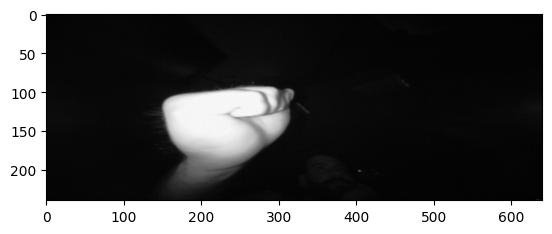

In [ ]:
x = 0
for img in os.listdir(folds[0]):
    x += 1
    img_array = imread(os.path.join(folds[0],img))
    plt.imshow(img_array, cmap='gray')
    plt.show()
    if x == 1:
        break

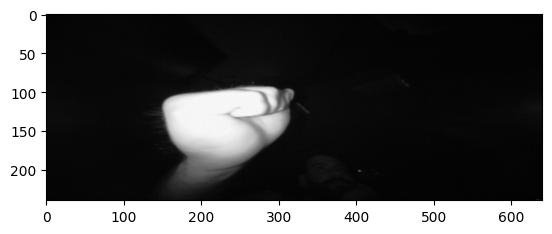

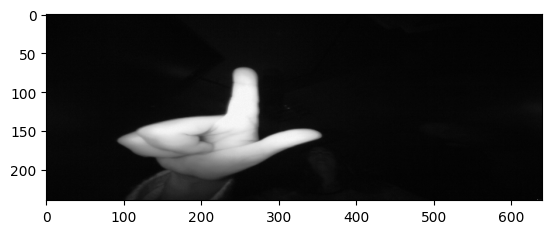

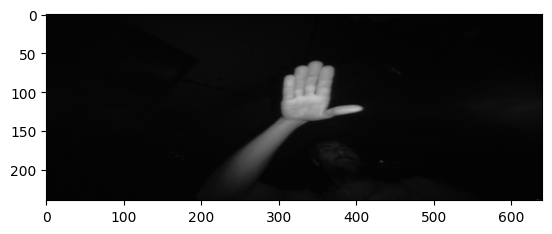

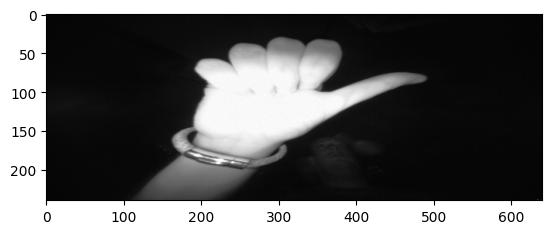

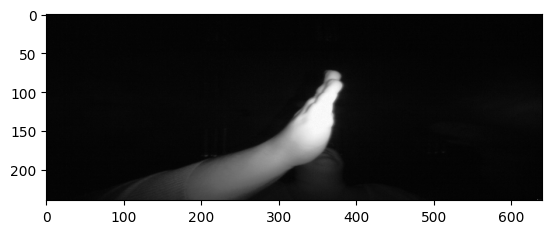

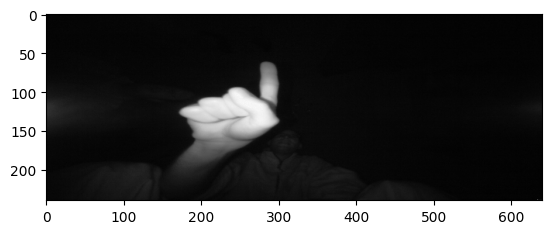

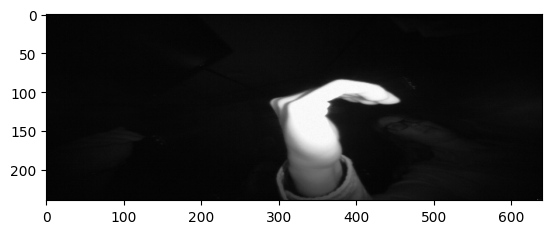

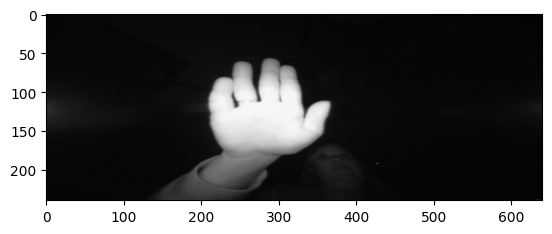

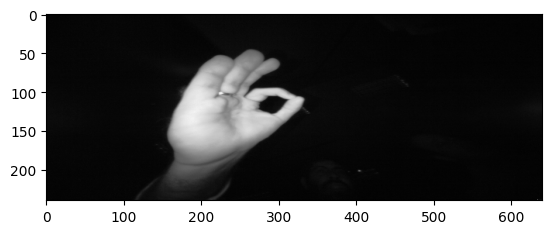

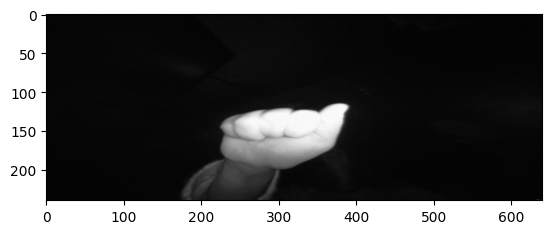

In [ ]:
for fold in folds:
    x = 0
    for img in os.listdir(fold):
        x +=1
        img_array = imread(os.path.join(fold,img))
        plt.imshow(img_array, cmap='gray')
        plt.show()
        if x == 1:
            break

In [81]:
# checking sizes of images
AllSizes = []

for fold in folds:
    for img in os.listdir(fold):
        img_array = imread(os.path.join(fold,img))
        AllSizes.append(img_array.shape)
set(AllSizes)

{(240, 640, 3)}

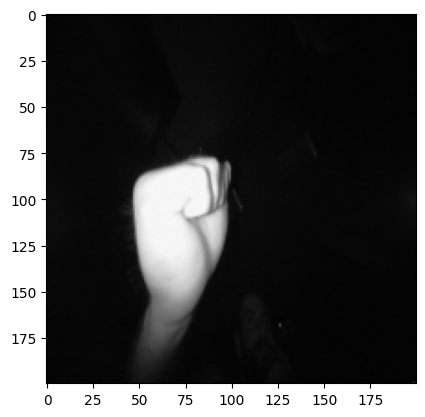

In [ ]:
width, height = 200, 200

x = 0
for img in os.listdir(folds[0]):
    x += 1
    img_array = imread(os.path.join(folds[0],img))
    img_array_resize = resize(img_array,(width,height))
    plt.imshow(img_array_resize)
    plt.show()
    if x == 1:
        break

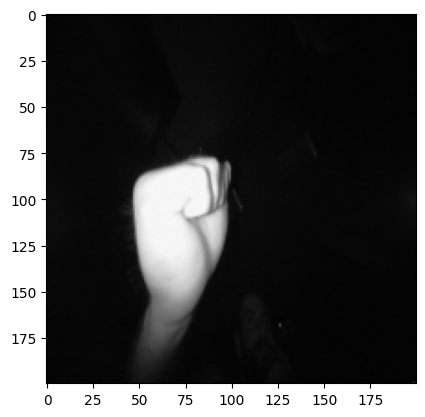

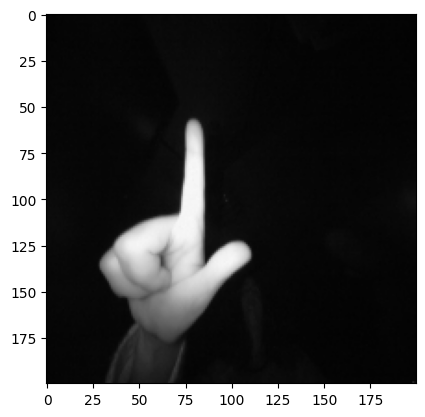

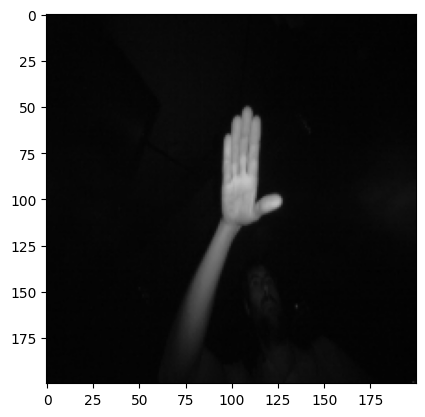

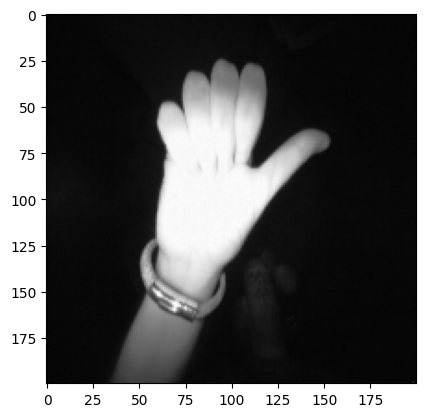

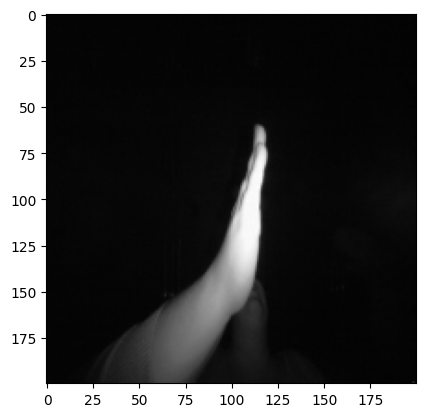

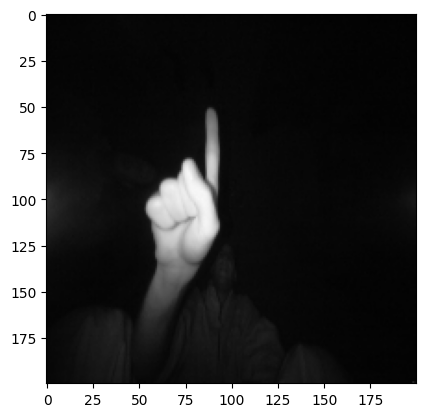

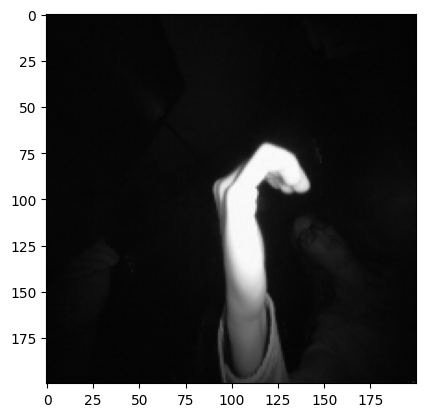

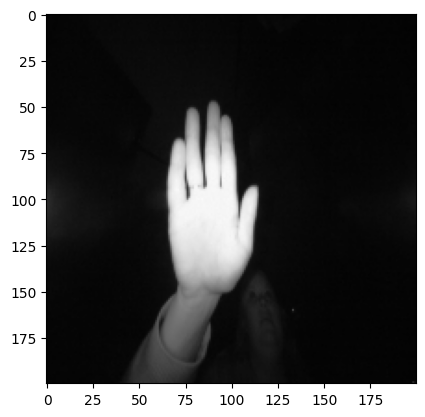

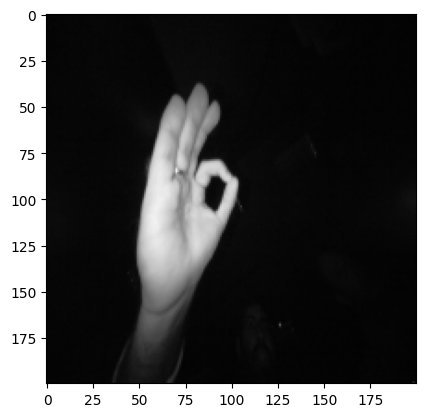

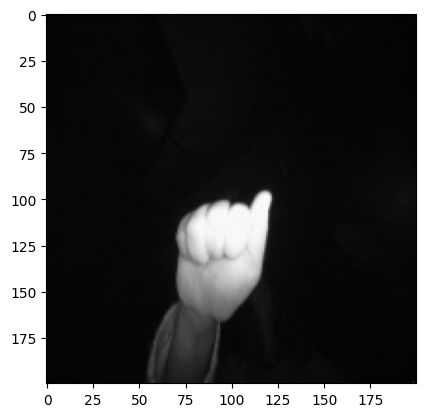

In [ ]:
for fold in folds:
    x = 0
    for img in os.listdir(fold):
        x += 1
        img_array = imread(os.path.join(fold,img))
        img_array_resize = resize(img_array, (width,height))
        plt.imshow(img_array_resize)
        plt.show()
        if x==1:
            break

In [84]:
training_data=[]

def create_training_data():
    for fold in folds:
        class_num = folds.index(fold)
        for img in tqdm(os.listdir(fold)):
            img_array = imread(os.path.join(fold,img))
            img_array_resize = resize(img_array,(width,height))
            training_data.append([img_array_resize,class_num])

create_training_data()

100%|██████████| 2000/2000 [00:05<00:00, 360.81it/s]


In [85]:
print(training_data[:1])

[[array([[[ 5,  5,  5],
        [ 4,  4,  4],
        [ 5,  5,  5],
        ...,
        [ 3,  3,  3],
        [ 4,  4,  4],
        [ 4,  4,  4]],

       [[ 4,  4,  4],
        [ 4,  4,  4],
        [ 5,  5,  5],
        ...,
        [ 4,  4,  4],
        [ 4,  4,  4],
        [ 3,  3,  3]],

       [[ 4,  4,  4],
        [ 4,  4,  4],
        [ 5,  5,  5],
        ...,
        [ 4,  4,  4],
        [ 4,  4,  4],
        [ 4,  4,  4]],

       ...,

       [[ 4,  4,  4],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [ 4,  4,  4],
        [ 4,  4,  4],
        [ 4,  4,  4]],

       [[ 4,  4,  4],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [ 4,  4,  4],
        [ 4,  4,  4],
        [ 3,  3,  3]],

       [[ 6,  6,  6],
        [ 4,  4,  4],
        [ 5,  5,  5],
        ...,
        [ 3,  3,  3],
        [35, 35, 35],
        [12, 12, 12]]], dtype=uint8), 0]]


In [86]:
training_data[0][0][0]

array([[ 5,  5,  5],
       [ 4,  4,  4],
       [ 5,  5,  5],
       [ 4,  4,  4],
       [ 4,  4,  4],
       [ 4,  4,  4],
       [ 5,  5,  5],
       [ 5,  5,  5],
       [ 5,  5,  5],
       [ 5,  5,  5],
       [ 5,  5,  5],
       [ 6,  6,  6],
       [ 5,  5,  5],
       [ 7,  7,  7],
       [ 6,  6,  6],
       [ 5,  5,  5],
       [ 6,  6,  6],
       [ 6,  6,  6],
       [ 5,  5,  5],
       [ 4,  4,  4],
       [ 6,  6,  6],
       [ 5,  5,  5],
       [ 7,  7,  7],
       [ 5,  5,  5],
       [ 7,  7,  7],
       [ 9,  9,  9],
       [ 5,  5,  5],
       [ 6,  6,  6],
       [ 6,  6,  6],
       [ 8,  8,  8],
       [ 7,  7,  7],
       [ 6,  6,  6],
       [ 6,  6,  6],
       [ 6,  6,  6],
       [ 6,  6,  6],
       [ 6,  6,  6],
       [ 5,  5,  5],
       [ 5,  5,  5],
       [ 6,  6,  6],
       [ 6,  6,  6],
       [ 6,  6,  6],
       [ 6,  6,  6],
       [ 6,  6,  6],
       [ 5,  5,  5],
       [ 3,  3,  3],
       [ 3,  3,  3],
       [ 4,  4,  4],
       [ 5,  

In [87]:
import random
random.shuffle(training_data)
for sample in training_data[:10]:
    print(sample[1])

6
8
0
5
5
0
0
9
5
7


In [23]:
x= []
y= []

for label, fold in enumerate(folds):
    for img_name in tqdm(os.listdir(fold)):
        img_path = os.path.join(fold,img_name)
        img = imread(img_path, IMREAD_GRAYSCALE)
        img = resize(img,(width,height))
        x.append(img)
        y.append(label)

100%|██████████| 2000/2000 [00:03<00:00, 535.02it/s]


In [24]:
len(x)

20000

In [25]:
len(y)

20000

In [26]:
x[:1]

[array([[ 5,  4,  5, ...,  3,  4,  4],
        [ 4,  4,  5, ...,  4,  4,  3],
        [ 4,  4,  5, ...,  4,  4,  4],
        ...,
        [ 4,  5,  5, ...,  4,  4,  4],
        [ 4,  5,  5, ...,  4,  4,  3],
        [ 6,  4,  5, ...,  3, 35, 12]], dtype=uint8)]

In [27]:
# print(y)

In [28]:
x = np.array(x).reshape(-1, 200, 200, 1) 
y = np.array(y)

In [29]:
x

array([[[[ 5],
         [ 4],
         [ 5],
         ...,
         [ 3],
         [ 4],
         [ 4]],

        [[ 4],
         [ 4],
         [ 5],
         ...,
         [ 4],
         [ 4],
         [ 3]],

        [[ 4],
         [ 4],
         [ 5],
         ...,
         [ 4],
         [ 4],
         [ 4]],

        ...,

        [[ 4],
         [ 5],
         [ 5],
         ...,
         [ 4],
         [ 4],
         [ 4]],

        [[ 4],
         [ 5],
         [ 5],
         ...,
         [ 4],
         [ 4],
         [ 3]],

        [[ 6],
         [ 4],
         [ 5],
         ...,
         [ 3],
         [35],
         [12]]],


       [[[ 5],
         [ 5],
         [ 4],
         ...,
         [ 5],
         [ 4],
         [ 6]],

        [[ 5],
         [ 4],
         [ 4],
         ...,
         [ 5],
         [ 4],
         [ 4]],

        [[ 5],
         [ 4],
         [ 5],
         ...,
         [ 5],
         [ 5],
         [ 5]],

        ...,

        [[ 5],
 

In [30]:
y

array([0, 0, 0, ..., 9, 9, 9])

In [31]:
x = x.astype('float32') / 255.0

print(f"x shape: {x.shape}")
print(f"y shape: {y.shape}")

x shape: (20000, 200, 200, 1)
y shape: (20000,)


In [32]:
x[:1]

array([[[[0.01960784],
         [0.01568628],
         [0.01960784],
         ...,
         [0.01176471],
         [0.01568628],
         [0.01568628]],

        [[0.01568628],
         [0.01568628],
         [0.01960784],
         ...,
         [0.01568628],
         [0.01568628],
         [0.01176471]],

        [[0.01568628],
         [0.01568628],
         [0.01960784],
         ...,
         [0.01568628],
         [0.01568628],
         [0.01568628]],

        ...,

        [[0.01568628],
         [0.01960784],
         [0.01960784],
         ...,
         [0.01568628],
         [0.01568628],
         [0.01568628]],

        [[0.01568628],
         [0.01960784],
         [0.01960784],
         ...,
         [0.01568628],
         [0.01568628],
         [0.01176471]],

        [[0.02352941],
         [0.01568628],
         [0.01960784],
         ...,
         [0.01176471],
         [0.13725491],
         [0.04705882]]]], dtype=float32)

In [33]:
y[:1]

array([0])

------------------------------

### **Spliting Data**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.8,random_state=1234)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(16000, 200, 200, 1)
(4000, 200, 200, 1)
(16000,)
(4000,)


---------------------------------------

### **Building Convolutional Neural Network**

In [ ]:
model = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), strides=(2, 2), padding='VALID', input_shape=(width, height, 1)),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.7),

    layers.Conv2D(filters=64, kernel_size=(3, 3), strides=(2, 2), padding='VALID'),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Dropout(0.7),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu',kernel_regularizer=regularizers.l2(0.01)),
    layers.Dropout(0.5), 
    layers.Dense(10, activation='softmax')
])

In [ ]:
model.compile(
    optimizer=optimizers.Adam(learning_rate=0.0001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

In [50]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 99, 99, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 99, 99, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 99, 99, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 49, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 49, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 24, 24, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │     1,179,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,200,266 (4.58 MB)

 Trainable params: 1,200,074 (4.58 MB)

 Non-trainable params: 192 (768.00 B)

--------------------------------------

### **Training Model**

In [ ]:
early_stopping = callbacks.EarlyStopping(	
				monitor='val_accuracy',	
				patience=5,										
				restore_best_weights=True)

history=model.fit(	
		x_train,y_train,	
        batch_size=65,
		steps_per_epoch	=50,
		epochs=50,	
        validation_split=0.1,
		verbose=1,	
		callbacks=[early_stopping])

Epoch 1/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 38s 684ms/step - accuracy: 0.1067 - loss: 6.8945 - val_accuracy: 0.0950 - val_loss: 4.7905
Epoch 2/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 33s 666ms/step - accuracy: 0.1342 - loss: 4.7667 - val_accuracy: 0.0950 - val_loss: 4.7192
Epoch 3/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 33s 666ms/step - accuracy: 0.1437 - loss: 4.6368 - val_accuracy: 0.0994 - val_loss: 4.6332
Epoch 4/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 34s 676ms/step - accuracy: 0.1860 - loss: 4.4887 - val_accuracy: 0.1088 - val_loss: 4.5376
Epoch 5/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 16s 305ms/step - accuracy: 0.2165 - loss: 4.3647 - val_accuracy: 0.1656 - val_loss: 4.4900
Epoch 6/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 34s 686ms/step - accuracy: 0.2156 - loss: 4.2984 - val_accuracy: 0.2037 - val_loss: 4.3877
Epoch 7/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 34s 676ms/step - accuracy: 0.2670 - loss: 4.1085 - val_accuracy: 0.2344 - val_loss: 4.2772
Epoch 8/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 34s 672ms/step - accuracy: 0.2834 - loss: 3.9634 - val_accu

------------------------------

### **Model Evaluation**

In [57]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=1)

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

125/125 ━━━━━━━━━━━━━━━━━━━━ 7s 55ms/step - accuracy: 0.9458 - loss: 1.0514
Test Loss: 1.0560
Test Accuracy: 0.9467


In [59]:
# **Loading Model**
#from keras.models import load_model

#model.save('Hand_Gesture_Recognition_model.h5')
#print("Model saved successfully!")

Model saved successfully!


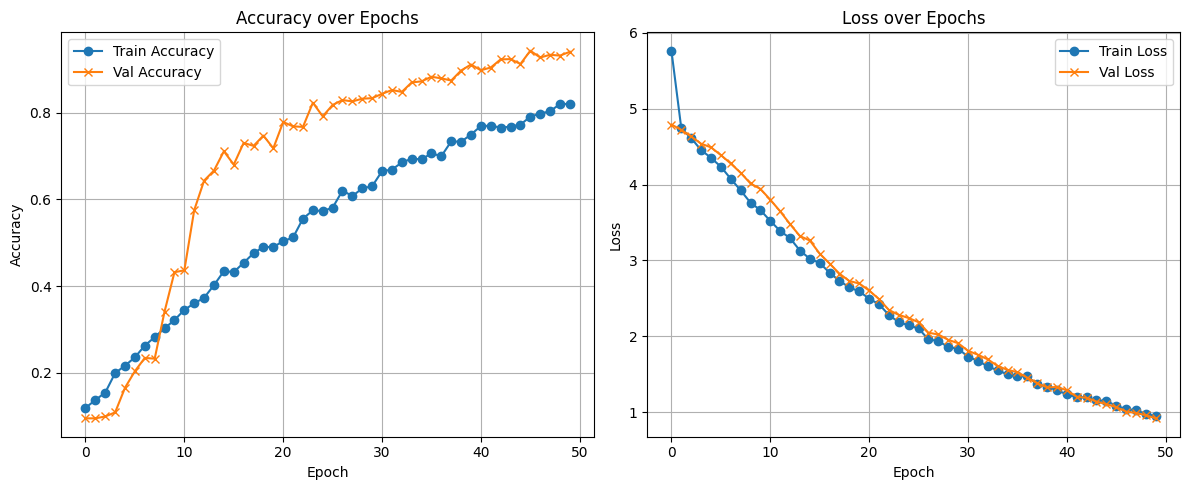

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Val Accuracy', marker='x')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Val Loss', marker='x')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

#### The plots suggest that the model is learning effectively as both accuracy increases and loss decreases over time. The most notable observation is that the validation accuracy is consistently higher than the training accuracy, and validation loss is often similar to or slightly lower than training loss. This is an unusual but not impossible scenario. It could indicate:

- ##### The validation set is "easier" than the training set.

- ##### The training process incorporates some techniques (e.g., strong regularization, specific data augmentations) that make the training loss higher or accuracy lower during the training phase itself, but which ultimately lead to better generalization on the validation set.

- ##### There might be a slight data mismatch or difference in complexity between the training and validation sets.

In [63]:
y_pred_probs = model.predict(x_test) 
y_pred = np.argmax(y_pred_probs, axis=1)  

y_true = y_test  

125/125 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step


<Figure size 1200x600 with 0 Axes>

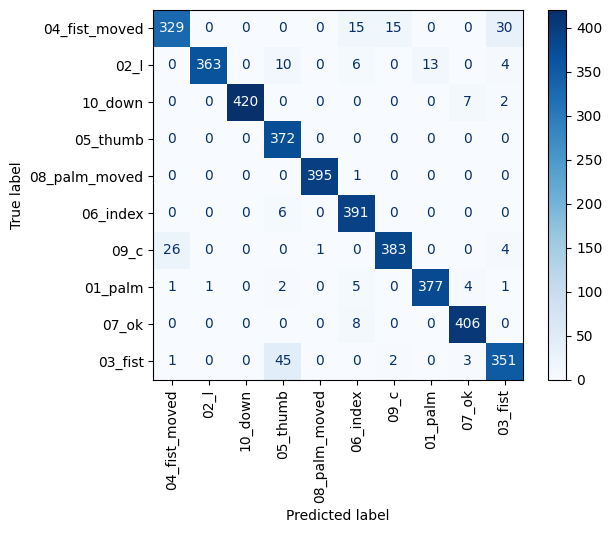

In [ ]:
plt.figure(figsize = (12,6))
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=categories)
disp.plot(xticks_rotation='vertical', cmap='Blues')
plt.show()

- ##### **Rows (True Label):** These represent the actual classes of the data. For example, "04_fist_moved", "02_l", "10_down", etc.

- ##### **Columns (Predicted Label):** These represent the classes that the model predicted.

- ##### **Numbers in the cells:** Each cell at the intersection of a true label row and a predicted label column shows how many instances of the true label were predicted as that specific predicted label.

- ##### **Diagonal elements:** The numbers on the diagonal (from top-left to bottom-right) represent the number of correctly classified instances for each class. For example, 329 instances of "04_fist_moved" were correctly predicted as "04_fist_moved".

- ##### **Off-diagonal elements:** These numbers represent misclassifications. For example, in the "04_fist_moved" row, there are instances that were actually "04_fist_moved" but were predicted as other classes (e.g., 15 as "10_down", 15 as "09_c", etc.).

- ##### **Color Bar:** The color bar on the right indicates the count range, with darker shades of blue representing higher counts.

-------------------------------------------
------------------------------------------

## <center><strong> Conclusion </strong></center>
---------------------------------------------------

#### **In this project, we developed a Convolutional Neural Network (CNN) model to classify images of hand gestures into 10 distinct categories. After training the model on labeled image data, we evaluated its performance using unseen test images—selecting one sample from each class—and observed accurate predictions for most cases. The model demonstrated good generalization ability and robustness to new inputs, making it suitable for potential real-time gesture recognition applications. This work highlights the effectiveness of CNNs in visual pattern recognition and provides a solid foundation for further improvements or deployment in interactive systems.**
------------------------------------